# Practical project Data Scientist Associate 

## **Task 1**

The dataset has 1500 rows and 8 columns, with some missing values before cleaning. I checked and validated all the columns according to the criteria in the dataset table:
*   **owned:** Same as description, without missing values, 2 categories (0 - unowned, 1 - owned);
*   **make_model:** Same as description, without missing values, 6 categories;
*   **review_month:** Without missing values, but some observations didn't match the description from the dataset table. I cleaned the data by extracting only the month from these observations and bringing them to the necessary values ​​according to the criteria in the table;
*   **web_browser:** 150 missing values witch I replaced with "unknown";
*   **reviewer_age:** 105 missing values that were marked with **'-'**. So, I replaced the missing values with the average age (32). Also, because are descrete values, I converted it into integer data type;
*   **primary_use:** Same as description, without missing values, 2 categories;
*   **value_for_money:** Without missing values, but didn't meet the criteria from the dataset table. I cleaned the data by extracting only the rating (from 1 tot 10) and bringing them to the necessary values acording to the criteria in the dataset table. Also, because are descrete values, I converted it into integer data type;
*   **overall_rating:** Same as description, without missing values.
After celaning and valitadtion, the dataset contains 1500 rows and 8 columns.

### Importing libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

### Loading and viewing the dataset

In [98]:
# load the dataset
df_moped = pd.read_csv('electric_bike_ratings_2212.csv')

# quick view of the dataframe (first five rows)
df_moped.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [99]:
# view the shape of the dataframe
df_moped.shape

(1500, 8)

In [100]:
# summary info of df_moped
# check all the columns from df_moped
df_moped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Performing EDA (Exploratory Data Analysis)

#### Validating columns against the criteria in the dataset table

In [101]:
# create a copy of df_moped in order to perform EDA without changeing the original dataframe
df = df_moped

In [102]:
# checking the name of the columns in df_moped
df.columns

Index(['owned', 'make_model', 'review_month', 'web_browser', 'reviewer_age',
       'primary_use', 'value_for_money', 'overall_rating'],
      dtype='object')

In [103]:
# looking for missing observations in the dataframe
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

As we can see there are 150 observations in web_browser column that are missing. I will replace the missing values with 'unknown'

In [104]:
# replace NaN with unknown in df['web_browser']
df['web_browser'].fillna('unknown', inplace = True)

In [105]:
# view summary of df['web_browser'] to see if we still have missing values. 
df['web_browser'].value_counts()

Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [107]:
df['review_month'].value_counts()

Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64

In [108]:
# define a function in order to clean df['review_month']

def clean_list(a_list):
  cleaned_list = []
  a_str = ''
  for string in a_list:
    if len(string) <= 3:
      cleaned_list.append(string)
    else:
      a_str = string.split('-')[1]
      cleaned_list.append(a_str)
  return cleaned_list

In [109]:
# create a list with all observations from df['review_month']
a_list = [x for x in df['review_month']]

# apply function on the list and create new column in df in order to check if the function correctly applied
df['month_rev'] = clean_list(a_list)

# apply changes on df['review_month']
df['review_month'] = df['month_rev']

# drop the new created column because we do not need it any more
df = df.drop(columns = 'month_rev')

In [110]:
# quick view of df
df.head(5)

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29


In [111]:
# view summary on df['make_model']
df['make_model'].value_counts()

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64

In [112]:
# view summary of all columns in dataframe
for col in df.columns:
  print(df[col].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64
Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
-     105
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
23     43
16     43
48     42
46     41
21     41
22     40
33     39
26     39
36     39
24     39
25     38
27     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64
5/10     387
6/10     323
4/10     3

In [113]:
# check the type of every column in df
df.dtypes

owned                int64
make_model          object
review_month        object
web_browser         object
reviewer_age        object
primary_use         object
value_for_money     object
overall_rating     float64
dtype: object

In [114]:
# create a list and extract all existing values from df['reviewer_age'], except '-'
age_val = [x for x in df['reviewer_age'] if x != '-']

# check the length of age_val
len(age_val)

1395

In [115]:
# compute the average age
sum_age_val = sum([int(n) for n in age_val if n])

avg = float(sum_age_val)/len(age_val)
average_age = int(avg)
average_age

32

In [116]:
# replace missing values ('-') in df['reviewer_age'] with the average age
df['reviewer_age'].replace('-', 32, inplace = True)

# change the type of df['reviewer_age'] to integer
df['reviewer_age'] = df['reviewer_age'].astype(int)

In [117]:
# view summary info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


In [118]:
# quick view of dataframe
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29


As we can see, rating in value_for_money column it's not as in the description. I will extract only the descrete numbers (from 1 to 10) and I will apply it on the column.

In [119]:
# define a function in order to extract the rating from df['value_for_money']
def rating(some_str):
  return some_str.split('/')[0]

In [120]:
# apply function on df['value_for_money']
df['value_for_money'] = df['value_for_money'].apply(rating)

# change the type of df['value_for_money'] to integer
df['value_for_money'] = df['value_for_money'].astype(int)

In [121]:
# view summary info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [122]:
# view summary statistics of numerical features on df
df.describe()

,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.556000,4.977333,17.138907
std,0.491375,9.876769,1.486257,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,32.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,10.000000,22.760000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


## **Task 2**

### Creating visualizations against criteria in the dataset table

From **Fig. 1** we can see that the most number of reviews (59,3%) come from the people who own a moped. This may be due to the fact that they have experience with this product and because they are directly interested in the quality of the product. On the other hand, people who doesn't own a moped gives a review more likely based on the features they would want the product to have. I consider that data is balanced across these two categories.

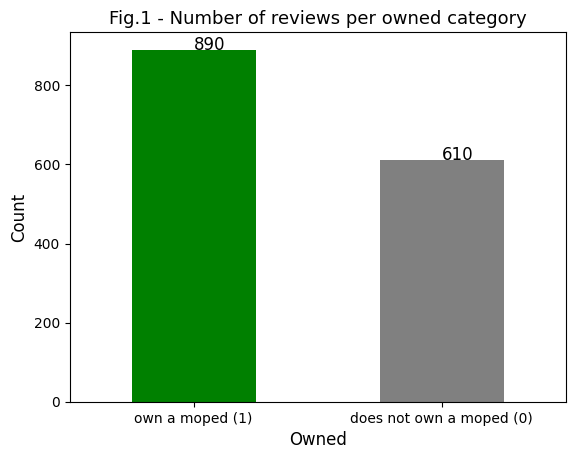

In [124]:
# Create a bar plot for owned categories
fig, ax = plt.subplots()

plt.title('Fig.1 - Number of reviews per owned category', fontsize = 13)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Owned',fontsize = 12)

my_colors = ['green', 'gray']
ax = df['owned'].value_counts().plot(kind = 'bar', color = my_colors)
ax.set_xticklabels(['own a moped (1)', 'does not own a moped (0)'], fontsize = 10)
plt.xticks(rotation = 0)
numbers = (890, 610)
for index,data in enumerate(numbers):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.show()

In [125]:
# view summary of df['owned']
df['owned'].value_counts(normalize = True)

1    0.593333
0    0.406667
Name: owned, dtype: float64

## **Task 3**

From **Fig. 2** we can see that the total rating score have the highest peak at around 19, witch means that most people give an overall rating of around 19. Also, from the graph could be observed that the majority of people gave a total rating score grater than 16.

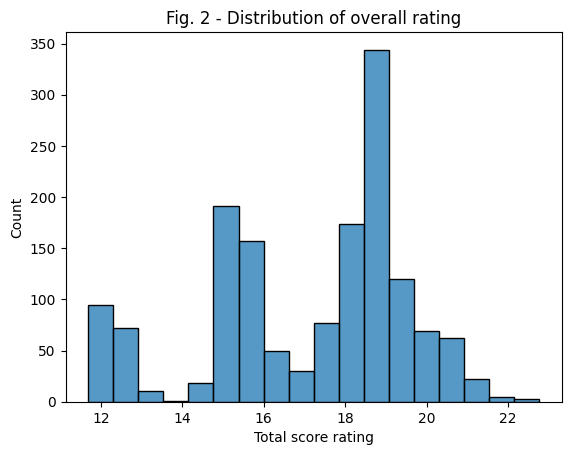

In [126]:
sns.histplot(data = df, x = 'overall_rating')
plt.title('Fig. 2 - Distribution of overall rating')
plt.xlabel('Total score rating')
plt.show()

## **Task 4**

**Fig. 3** shows us the relationship between our target variable and the total rating score. We can see that people who own a moped gave higher ratings (the median it's a slightly greater than 18th), even though there are some of them who gave much lower rating scores or biger (I don't consider being outliers). On the other hand, people who doesn't own a moped tend to give smaller ratings. 

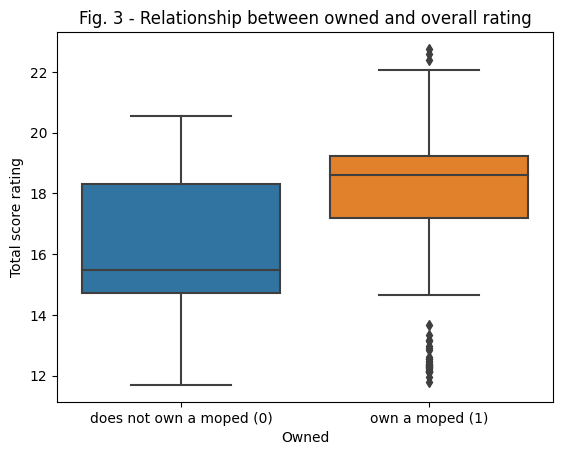

In [127]:
_, ax = plt.subplots()
sns.boxplot(data = df, x = 'owned', y = 'overall_rating').set(title = 'Fig. 3 - Relationship between owned and overall rating')
plt.ylabel('Total score rating')
ax.set_xticklabels(['does not own a moped (0)', 'own a moped (1)'], fontsize = 10)
plt.xticks(rotation = 0)
plt.xlabel('Owned')
plt.show()

## **Task 5**

### Training a model for prediction

Predicting if a review come from an owner or not is a **binary classification** problem in machine learning.

**Enable modeling**

In order to enable model fitting, I transformed all categorical variables into numeric variables

In [128]:
# quick view of df 
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29


In [129]:
# transforming all categoirical variables into numeric
dummy1 = pd.get_dummies(df[['make_model', 'review_month', 'web_browser', 'primary_use']])

# concatenate df with dummy1
df_dummy = pd.concat([df, dummy1], axis = 1)

In [130]:
# drop all categorical variable in order to fit the model
df_final = df_dummy.drop(columns = ['make_model', 'review_month', 'web_browser', 'primary_use'])

In [131]:
# quick view of df_final
df_final.head()

,owned,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Apr,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,review_month_May,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,23,5,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,24,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,28,5,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,41,5,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,33,5,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [132]:
# define X and y for the model
X = df_final.drop(['owned'], axis = 1)
y = df['owned']

In [133]:
# view shape of X and y
X.shape, y.shape

((1500, 30), (1500,))

In [134]:
# split the dataset into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape

((1050, 30), (1050,))

## **Task 6**

Baseline model - **Logistic Regression Model**

### Standardizing data

Because the dataset contains variable values that are different in scale, I standardized these data, using StandardScaler, to have a common scale.

In [135]:
# standardize data for Logistic regression
scaler = StandardScaler()
X_train_sc = X_train
X_test_sc = X_test

X_train_sc[['reviewer_age', 'value_for_money', 'overall_rating']] = scaler.fit_transform(X_train_sc[['reviewer_age', 'value_for_money', 'overall_rating']])

X_test_sc[['reviewer_age', 'value_for_money', 'overall_rating']] = scaler.transform(X_test_sc[['reviewer_age', 'value_for_money', 'overall_rating']])

In [136]:
# quick view of X_train
X_train.head()

,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Apr,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,review_month_May,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
485,-1.374446,1.352054,0.681664,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
527,1.168313,-1.336690,0.889277,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
199,-0.357342,0.679868,1.528400,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
889,-0.052211,0.679868,0.640956,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
844,-0.153922,-0.664504,-1.703849,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Fit the model

In [137]:
# create model for Logistic Regression
model_lr = LogisticRegression()

# fit the model
model_lr.fit(X_train_sc, y_train)
y_pred_lr = model_lr.predict(X_test_sc)

## **Task 7**

Comparasion model - **Support Vector Machines** - SV Classifier

In [138]:
# create model for SV Classifier
model_svc = SVC()

# fit the model
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

## **Task 8**

I choose **Logistic Regression** as a baseline model because it is a simple and efficient model for classification problems and is most commonly used when the data in question has binary output. The comparation model I choose is **Support Vector Machine** (also commonly used for binary classification problems) because it is accurate, tends not to overfit data and it is relatively easy to interpret. 

## **Task 9**

For evaluating the performance of the model I am choosing **accuracy score** and **F1 score**. 

**Accuracy** is commonly used when the data is balanced between classes and also when these classes are equally important. It measures how many observations (owned or unowned) were correctly classified. 

**F1 score** maseures the model's accuracy. It combines the precision and recall scores of the model, using their harmonic mean. This is why I printed confusion matrix and classification report of the two models I used.

In [139]:
# print accuracy score
print('\033[1mLogistic Regression\033[0m model accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred_lr)))

# print f1 score
print('\033[1mLogistic Regression\033[0m model F1-score : {0:0.4f}'.format(f1_score(y_test, y_pred_lr)))

Logistic Regression model accuracy : 0.7533
Logistic Regression model F1-score : 0.8076


In [140]:
# print accuracy score
print('\033[1mSVM\033[0m model accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred_svc)))

# print accuracy score
print('\033[1mSVM\033[0m model F1-score : {0:0.4f}'.format(f1_score(y_test, y_pred_svc)))

SVM model accuracy : 0.7489
SVM model F1-score : 0.8035


Text(0.5, 14.722222222222216, 'Predicted Values')

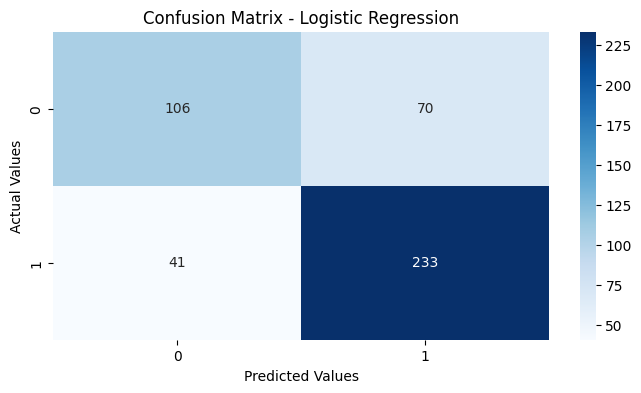

In [141]:
# make the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test,y_pred_lr)

# plot a heatmap for conffusion matrix
plt.figure(figsize=(8,4))
plt.title('Confusion Matrix - Logistic Regression')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Text(0.5, 14.722222222222216, 'Predicted Values')

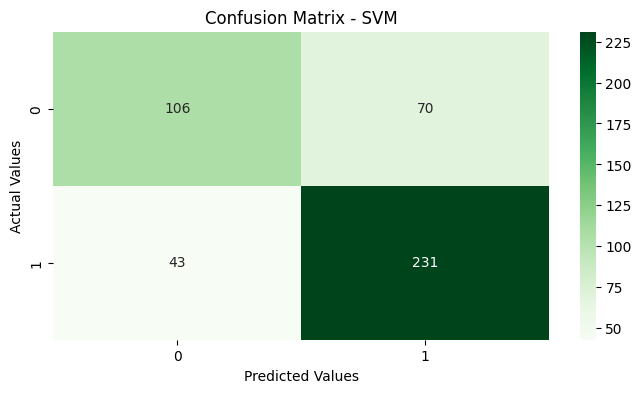

In [142]:
# make the confusion matrix for SVM
cm_svc = confusion_matrix(y_test,y_pred_svc)

# plot a heatmap for conffusion matrix
plt.figure(figsize=(8,4))
plt.title('Confusion Matrix - SVM')
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [143]:
# classification report for Logistic Regression
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66       176
           1       0.77      0.85      0.81       274

    accuracy                           0.75       450
   macro avg       0.75      0.73      0.73       450
weighted avg       0.75      0.75      0.75       450



In [144]:
# classification report for SVM
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       176
           1       0.77      0.84      0.80       274

    accuracy                           0.75       450
   macro avg       0.74      0.72      0.73       450
weighted avg       0.75      0.75      0.74       450



## **Task 10**

A higher **accuracy** and **f1 score** denotes a better quality classifier. Even the scores between the two models are tight, **Logistic Regression** has a slitly higher accuracy and, also, higher f1 score, meaning that this model performed a bit better.